<a href="https://colab.research.google.com/github/SUVARNATV/Machine-Learning-/blob/main/40Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/train-data.csv')
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [ ]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [ ]:
df.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [ ]:
df.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [ ]:
df['Location'].value_counts()

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: count, dtype: int64

In [ ]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

In [ ]:
df['Transmission'].value_counts()

Transmission
Manual       4299
Automatic    1720
Name: count, dtype: int64

In [ ]:
df['Owner_Type'].value_counts()

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
Name: count, dtype: int64

In [ ]:
df['Name'].value_counts()

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: count, Length: 1878, dtype: int64

Text(0.5, 1.0, 'Location graphs')

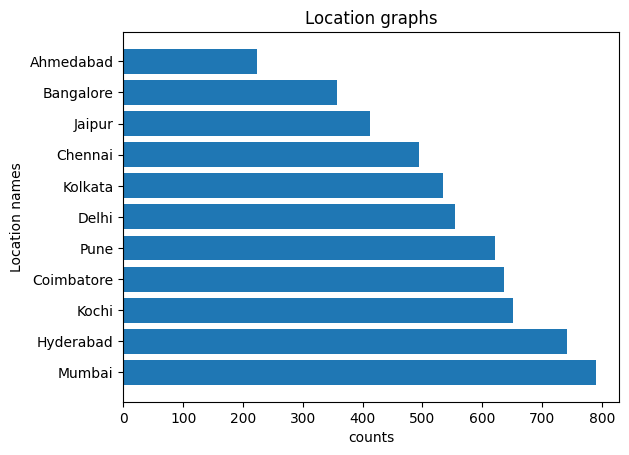

In [ ]:
Location=df['Location'].value_counts()
name=[]
count=[]
for i in Location.keys():
  name.append(i)
for i in Location:
  count.append(i)
plt.barh(name,count)
plt.xlabel('counts')
plt.ylabel('Location names')
plt.title('Location graphs')


Text(0.5, 1.0, 'Fuel_Type graph')

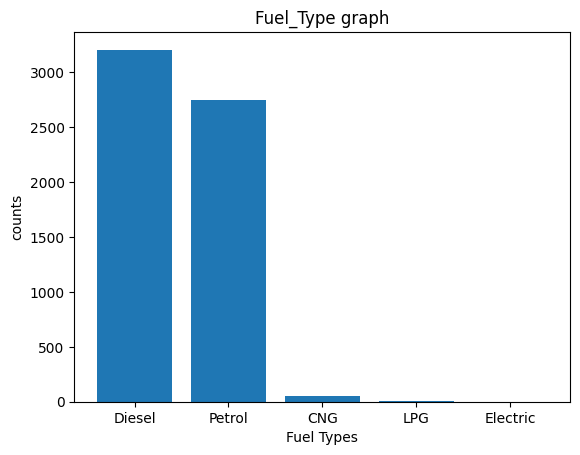

In [ ]:
Fuel=df['Fuel_Type'].value_counts()
name1=[]
count1=[]
for i in Fuel.keys():
  name1.append(i)
for i in Fuel:
  count1.append(i)
plt.bar(name1,count1)
plt.xlabel('Fuel Types')
plt.ylabel('counts')
plt.title('Fuel_Type graph')

Text(0.5, 1.0, 'Transmission Graph')

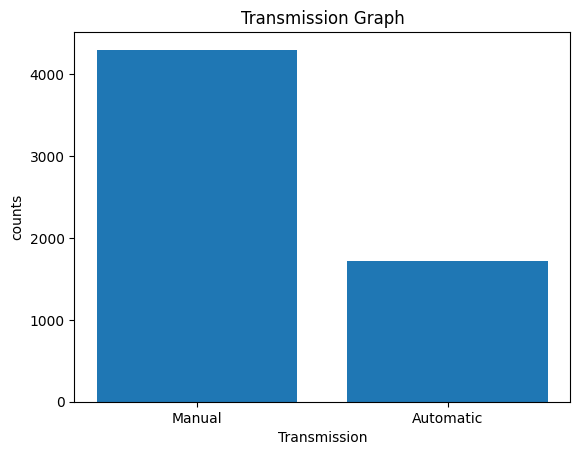

In [ ]:
Transmission=df['Transmission'].value_counts()
name2=[]
count2=[]
for i in Transmission.keys():
  name2.append(i)
for i in Transmission:
  count2.append(i)
plt.bar(name2,count2)
plt.xlabel('Transmission')
plt.ylabel('counts')
plt.title('Transmission Graph')

Text(0.5, 1.0, 'Owner type graph')

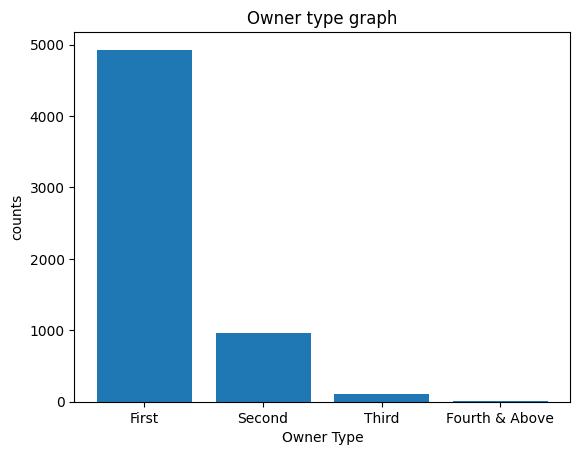

In [ ]:
Owner=df['Owner_Type'].value_counts()
name3=[]
count3=[]
for i in Owner.keys():
  name3.append(i)
for i in Owner:
  count3.append(i)
plt.bar(name3,count3)
plt.xlabel('Owner Type')
plt.ylabel('counts')
plt.title('Owner type graph')

In [ ]:
#encoding using get dummies
df1=pd.get_dummies(df[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)
df1=df1.astype(int)
df1

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
6015,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
6016,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
6017,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [ ]:
dfe=pd.concat([df,df1],axis=1)
dfe

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,...,1,0,0,0,0,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,...,0,1,1,0,0,0,1,0,0,0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,...,0,0,0,0,0,1,1,0,0,0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,...,0,0,1,0,0,0,1,0,0,0
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,...,0,0,1,0,0,0,1,0,0,0
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,...,0,0,1,0,0,0,1,0,1,0
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
dfe.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price'],axis=1,inplace=True)
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
#replacing string in columns Mileage,Engine,Power
#units are replaced with non space
dfe['Mileage']=dfe['Mileage'].str.replace('km/kg','')
dfe['Mileage']=dfe['Mileage'].str.replace('kmpl','')
dfe['Engine']=dfe['Engine'].str.replace('CC','')
dfe['Power']=dfe['Power'].str.replace('bhp','')
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
dfe['Mileage'].unique()

array(['26.6 ', '19.67 ', '18.2 ', '20.77 ', '15.2 ', '21.1 ', '23.08 ',
       '11.36 ', '20.54 ', '22.3 ', '21.56 ', '16.8 ', '25.2 ', '12.7 ',
       '0.0 ', '13.5 ', '25.8 ', '28.4 ', '20.45 ', '14.84 ', '22.69 ',
       '23.65 ', '13.53 ', '18.5 ', '14.4 ', '20.92 ', '17.5 ', '12.8 ',
       '19.01 ', '14.53 ', '11.18 ', '12.4 ', '16.09 ', '14.0 ', '24.3 ',
       '18.15 ', '11.74 ', '22.07 ', '19.7 ', '25.4 ', '25.32 ', '14.62 ',
       '14.28 ', '14.9 ', '11.25 ', '24.4 ', '16.55 ', '17.11 ', '22.9 ',
       '17.8 ', '18.9 ', '15.04 ', '25.17 ', '20.36 ', '13.29 ', '13.68 ',
       '20.0 ', '15.8 ', '25.0 ', '16.4 ', '24.52 ', '22.1 ', '8.5 ',
       '15.1 ', '16.95 ', '19.64 ', '16.5 ', '18.53 ', '17.57 ', '18.0 ',
       '23.2 ', '16.73 ', '17.0 ', '13.0 ', '17.68 ', '22.7 ', '16.2 ',
       '15.26 ', '23.0 ', '19.83 ', '14.94 ', '17.71 ', '14.74 ', '16.0 ',
       '22.32 ', '12.99 ', '23.3 ', '19.15 ', '10.8 ', '15.0 ', '22.0 ',
       '21.9 ', '12.05 ', '11.7 ', '21.21 ', '2

In [ ]:
dfe['Mileage']=dfe['Mileage'].str.replace('null','0')
dfe['Power']=dfe['Power'].str.replace('null','0')
dfe['Engine']=dfe['Engine'].str.replace('null','0')
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.6,998,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582,126.2,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.2,1199,88.7,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.2,1968,140.8,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.4,1248,74,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.4,1120,71,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.0,2498,112,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.9,998,67.1,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_Electric             int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
dtype: object

In [ ]:
#datatype conversion
dfe['Mileage']=dfe['Mileage'].astype('float')
dfe['Engine']=dfe['Engine'].astype('float')
dfe['Power']=dfe['Power'].astype('float')
dfe.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Price                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_Electric             int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
dtype: object

In [ ]:
dfe.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                       2
Engine                       36
Power                        36
Seats                        42
Price                         0
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_Electric            0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [ ]:
dfe.loc[dfe.Engine==0,'Engine']=np.NaN
dfe.loc[dfe.Mileage==0,'Mileage']=np.NaN
dfe.loc[dfe.Power==0,'Power']=np.NaN
dfe.isna().sum()

Year                           0
Kilometers_Driven              0
Mileage                       70
Engine                        36
Power                        143
Seats                         42
Price                          0
Location_Bangalore             0
Location_Chennai               0
Location_Coimbatore            0
Location_Delhi                 0
Location_Hyderabad             0
Location_Jaipur                0
Location_Kochi                 0
Location_Kolkata               0
Location_Mumbai                0
Location_Pune                  0
Fuel_Type_Diesel               0
Fuel_Type_Electric             0
Fuel_Type_LPG                  0
Fuel_Type_Petrol               0
Transmission_Manual            0
Owner_Type_Fourth & Above      0
Owner_Type_Second              0
Owner_Type_Third               0
dtype: int64

In [ ]:
#filling missing values
dfe['Mileage']=dfe['Mileage'].fillna(dfe['Mileage'].mean())
dfe['Engine']=dfe['Engine'].fillna(dfe['Engine'].mean())
dfe['Power']=dfe['Power'].fillna(dfe['Power'].mean())
dfe['Seats']=dfe['Seats'].fillna(dfe['Seats'].mode()[0])
dfe.isna().sum()


Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [ ]:
dfe

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
x=dfe.drop(['Price','Fuel_Type_Electric'],axis=1)
x

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
y=dfe['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [ ]:
df2=pd.read_csv('/content/test-data.csv')
df2

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN


In [ ]:
df2.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
df2.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN
1233,1233,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN


In [ ]:
df2.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [ ]:
df2.dtypes

Unnamed: 0             int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
dtype: object

In [ ]:
df2['Name'].value_counts()

Name
Maruti Alto LXi                                         9
Honda City 1.5 V MT                                     8
Maruti Swift Dzire VDI                                  8
Volkswagen Polo 1.2 MPI Highline                        8
Hyundai i10 Magna                                       7
                                                       ..
Hyundai Santro GLS I - Euro II                          1
Honda City i DTec VX Option BL                          1
Land Rover Discovery 4 SDV6 SE                          1
Hyundai Verna CRDi 1.6 SX Option                        1
Mercedes-Benz E-Class 2009-2013 E 220 CDI Avantgarde    1
Name: count, Length: 769, dtype: int64

In [ ]:
df2['Location'].value_counts()

Location
Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: count, dtype: int64

In [ ]:
df2['Fuel_Type'].value_counts()

Fuel_Type
Diesel    647
Petrol    579
CNG         6
LPG         2
Name: count, dtype: int64

In [ ]:
df2['Transmission'].value_counts()

Transmission
Manual       905
Automatic    329
Name: count, dtype: int64

In [ ]:
df2['Owner_Type'].value_counts()

Owner_Type
First             1023
Second             184
Third               24
Fourth & Above       3
Name: count, dtype: int64

Text(0.5, 1.0, 'Location Graph')

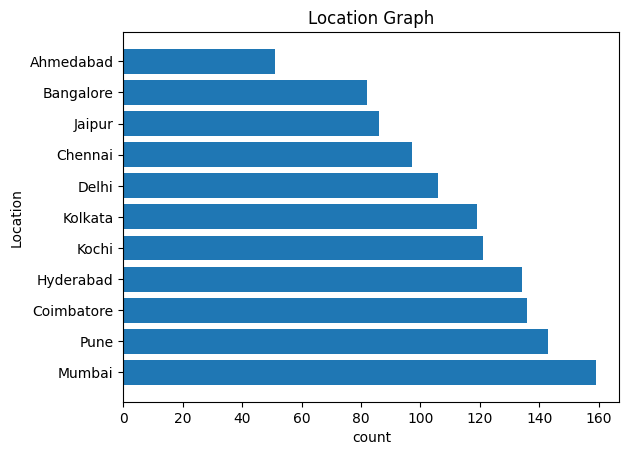

In [ ]:
Location=df2['Location'].value_counts()
name4=[]
count4=[]
for i in Location.keys():
  name4.append(i)
for i in Location:
  count4.append(i)
plt.barh(name4,count4)
plt.xlabel('count')
plt.ylabel('Location')
plt.title('Location Graph')

Text(0.5, 1.0, 'Fuel_Type Graph')

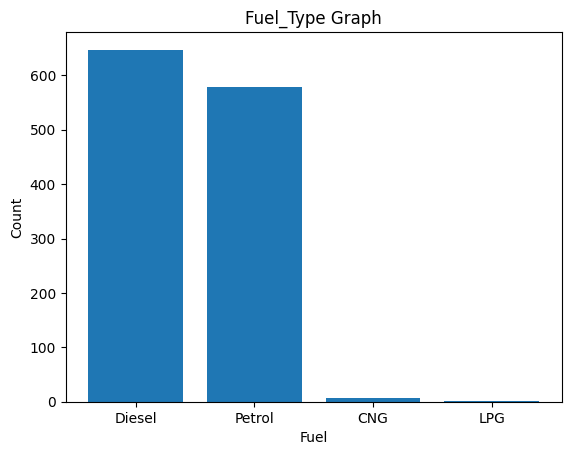

In [ ]:
Fuel=df2['Fuel_Type'].value_counts()
name5=[]
count5=[]
for i in Fuel.keys():
  name5.append(i)
for i in Fuel:
  count5.append(i)
plt.bar(name5,count5)
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.title('Fuel_Type Graph')


Text(0.5, 1.0, 'Transmission Graph')

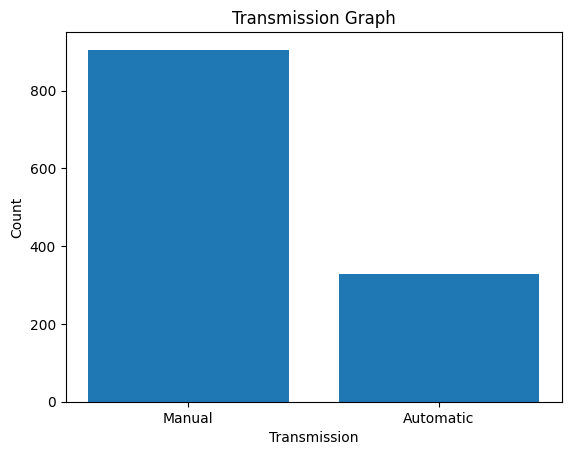

In [ ]:
Transmission=df2['Transmission'].value_counts()
name6=[]
count6=[]
for i in Transmission.keys():
  name6.append(i)
for i in Transmission:
  count6.append(i)
plt.bar(name6,count6)
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Transmission Graph')

Text(0.5, 1.0, 'Owner_Type Graph')

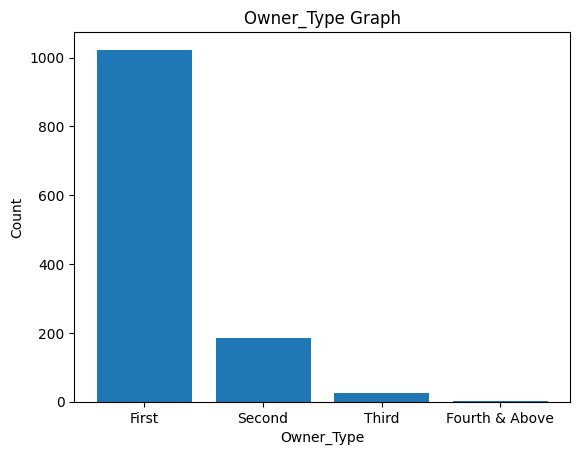

In [ ]:
Owner=df2['Owner_Type'].value_counts()
name7=[]
count7=[]
for i in Owner.keys():
  name7.append(i)
for i in Owner:
  count7.append(i)
plt.bar(name7,count7)
plt.xlabel('Owner_Type')
plt.ylabel('Count')
plt.title('Owner_Type Graph')

In [ ]:
df3=pd.get_dummies(df2[['Location','Fuel_Type','Transmission','Owner_Type']],drop_first=True)
df3=df3.astype(int)
df3

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0
2,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1230,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1231,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1232,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
dff=pd.concat([df2,df3],axis=1)
dff

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,...,0,0,0,0,0,0,1,0,0,0
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,...,0,0,0,0,0,1,1,0,1,0
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,...,0,1,0,1,0,0,1,0,0,0
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,...,0,0,0,1,0,0,1,0,0,0
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,...,0,0,0,1,0,0,1,0,0,0
1230,1230,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,...,0,1,0,0,0,1,0,0,0,0
1231,1231,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,...,1,0,0,1,0,0,1,0,0,0
1232,1232,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
dff.drop(['Unnamed: 0','Name','Location','Fuel_Type','Transmission','Owner_Type','New_Price'],axis=1,inplace=True)
dff

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26 km/kg,998 CC,58.2 bhp,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7 kmpl,796 CC,47.3 bhp,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68 kmpl,2393 CC,147.8 bhp,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59 kmpl,1364 CC,null bhp,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5 kmpl,1197 CC,82.85 bhp,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54 kmpl,1598 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08 kmpl,1461 CC,63.1 bhp,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2 kmpl,1197 CC,103.6 bhp,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
dff['Mileage']=dff['Mileage'].str.replace('km/kg','')
dff['Mileage']=dff['Mileage'].str.replace('kmpl','')
dff['Engine']=dff['Engine'].str.replace('CC','')
dff['Power']=dff['Power'].str.replace('bhp','')
dff

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364,null,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
dfe['Mileage'].unique()

array([26.6       , 19.67      , 18.2       , 20.77      , 15.2       ,
       21.1       , 23.08      , 11.36      , 20.54      , 22.3       ,
       21.56      , 16.8       , 25.2       , 12.7       , 18.34225248,
       13.5       , 25.8       , 28.4       , 20.45      , 14.84      ,
       22.69      , 23.65      , 13.53      , 18.5       , 14.4       ,
       20.92      , 17.5       , 12.8       , 19.01      , 14.53      ,
       11.18      , 12.4       , 16.09      , 14.        , 24.3       ,
       18.15      , 11.74      , 22.07      , 19.7       , 25.4       ,
       25.32      , 14.62      , 14.28      , 14.9       , 11.25      ,
       24.4       , 16.55      , 17.11      , 22.9       , 17.8       ,
       18.9       , 15.04      , 25.17      , 20.36      , 13.29      ,
       13.68      , 20.        , 15.8       , 25.        , 16.4       ,
       24.52      , 22.1       ,  8.5       , 15.1       , 16.95      ,
       19.64      , 16.5       , 18.53      , 17.57      , 18.  

In [ ]:
dff['Mileage']=dff['Mileage'].str.replace('null','0')
dff['Power']=dff['Power'].str.replace('null','0')
dff['Engine']=dff['Engine'].str.replace('null','0')
dff

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998,58.2,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.7,796,47.3,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393,147.8,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364,0,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.5,1197,82.85,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598,103.6,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21,1197,103.6,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08,1461,63.1,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.2,1197,103.6,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
dff.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                       object
Engine                        object
Power                         object
Seats                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
dtype: object

In [ ]:
dff['Mileage']=dff['Mileage'].astype('float')
dff['Engine']=dff['Engine'].astype('float')
dff['Power']=dff['Power'].astype('float')
dff.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                        float64
Location_Bangalore             int64
Location_Chennai               int64
Location_Coimbatore            int64
Location_Delhi                 int64
Location_Hyderabad             int64
Location_Jaipur                int64
Location_Kochi                 int64
Location_Kolkata               int64
Location_Mumbai                int64
Location_Pune                  int64
Fuel_Type_Diesel               int64
Fuel_Type_LPG                  int64
Fuel_Type_Petrol               int64
Transmission_Manual            int64
Owner_Type_Fourth & Above      int64
Owner_Type_Second              int64
Owner_Type_Third               int64
dtype: object

In [ ]:
dff.loc[dff['Engine']==0,'Engine']=np.NaN
dff.loc[dff['Mileage']==0,'Mileage']=np.NaN
dff.loc[dff['Power']==0,'Power']=np.NaN
dff.isna().sum()

Year                          0
Kilometers_Driven             0
Mileage                      13
Engine                       10
Power                        32
Seats                        11
Location_Bangalore            0
Location_Chennai              0
Location_Coimbatore           0
Location_Delhi                0
Location_Hyderabad            0
Location_Jaipur               0
Location_Kochi                0
Location_Kolkata              0
Location_Mumbai               0
Location_Pune                 0
Fuel_Type_Diesel              0
Fuel_Type_LPG                 0
Fuel_Type_Petrol              0
Transmission_Manual           0
Owner_Type_Fourth & Above     0
Owner_Type_Second             0
Owner_Type_Third              0
dtype: int64

In [ ]:
dff['Mileage']=dff['Mileage'].fillna(dff['Mileage'].mean())
dff['Engine']=dff['Engine'].fillna(dff['Engine'].mean())
dff['Power']=dff['Power'].fillna(dff['Power'].mean())
dff['Seats']=dff['Seats'].fillna(dff['Seats'].mode()[0])
dff.isna().sum()


Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
dtype: int64

In [ ]:
dff

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2014,40929,32.26,998.0,58.20000,4.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2013,54493,24.70,796.0,47.30000,5.0,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
2,2017,34000,13.68,2393.0,147.80000,7.0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,2012,139000,23.59,1364.0,110.38042,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2014,29000,18.50,1197.0,82.85000,5.0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2011,89411,20.54,1598.0,103.60000,5.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1230,2015,59000,17.21,1197.0,103.60000,5.0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1231,2012,28000,23.08,1461.0,63.10000,5.0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1232,2013,52262,17.20,1197.0,103.60000,5.0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
z=dff.iloc[:]

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(z)
y_pred

array([ 2.87588492, -1.29344912, 16.1069494 , ...,  0.1378514 ,
        9.27293255, 21.48043251])